In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('default')

df = pd.read_csv("/datc/opschaler/combined_gas_smart_weather_dfs/processed/P01S01W8655_hour.csv",header=0,delimiter="\t",parse_dates = ['datetime'])
df = df.set_index(['datetime'])

In [2]:
df.head()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,DD,DR,FF,...,RG,SQ,T,T10,TD,U,VV,WW,dwelling,gasPower
datetime,,,,,,,,,,,,,,,,,,,,,
2017-04-24 12:00:00,778.058,0.0,736.961,0.0,153.76537,0.0,1591.658,255.05000,44.0,7.056667,...,0.0,1.276400,12.450000,13.983334,7.000000,68.833336,29966.666,10.833333,P01S01W8655,NaN
2017-04-24 13:00:00,778.207,0.0,736.961,0.0,148.48604,0.0,1591.658,252.86667,58.0,6.928333,...,0.0,0.513033,12.766666,13.850000,6.533333,65.333336,36050.000,32.666668,P01S01W8655,0.0
2017-04-24 14:00:00,778.418,0.0,736.961,0.0,214.16338,0.0,1591.658,259.85000,0.0,7.096667,...,0.0,1.507850,12.800000,14.266666,6.483334,65.000000,40366.668,5.500000,P01S01W8655,0.0
2017-04-24 15:00:00,778.570,0.0,736.961,0.0,151.11765,0.0,1591.658,263.51666,0.0,6.660000,...,0.0,0.000000,12.400000,13.633333,6.600000,67.333336,34000.000,2.000000,P01S01W8655,0.0
2017-04-24 16:00:00,778.750,0.0,736.961,0.0,180.75978,0.0,1591.658,252.88333,0.0,6.373334,...,0.0,0.130250,12.150000,13.033333,6.416666,67.333336,35150.000,2.000000,P01S01W8655,0.0


In [12]:
sample_rate = '1d'
def resample_df(df,sample_rate):
    
    input_df = df
    to_last = ['gasMeter','eMeter']
    input_df[to_last] = input_df[to_last].resample(sample_rate).last()
    input_df = input_df.resample(sample_rate).mean()
    
    return(input_df)

rdf=resample_df(df,sample_rate)

rdftrain = rdf[:]
rdftrain = rdftrain[rdftrain['T'] < 16]
rdfval = rdf[(25):]

bias = rdf[rdf['T'] > 16.5]
bias = bias['gasPower'].mean()

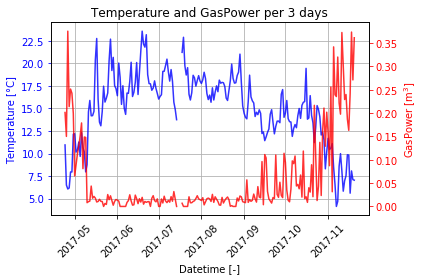

In [13]:
fig, ax1 = plt.subplots()
ax1.plot(rdf.index[:],rdf['T'][:], '-', color='b', ms=10, alpha=0.8)
plt.title('Temperature and GasPower per 3 days')
ax1.set_xlabel('Datetime [-]')
plt.xticks(rotation=45)
#Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Temperature [°C]', color='b')
ax1.tick_params('y', colors='b')
plt.grid()
fig.tight_layout()

ax2 = ax1.twinx()
ax2.plot(rdf.index[:],rdf['gasPower'][:], '-', color='r', ms=10, alpha=0.8)
ax2.set_ylabel('GasPower [m$^3$]', color='r')
ax2.tick_params('y', colors='r')
fig.tight_layout()

#plt.savefig('sample3d.png', dpi=1000)
plt.show()

[-0.02800412  0.44125794]


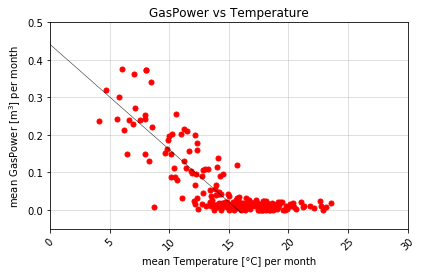

In [14]:
plt.title('GasPower vs Temperature')

plt.plot(rdf['T'][:],rdf['gasPower'][:], '.', color='r', ms=10)
plt.ylabel('mean GasPower [m$^3$] per month')
plt.xlabel('mean Temperature [°C] per month')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()

# linear regressions
params = np.polyfit(rdftrain['T'],rdftrain['gasPower'], 1)
def model(x, a, b):
    return a * x + b

# Extrapolations
x = np.array([-10,16])
plt.plot(x, model(x, *params), 'k', alpha=0.9, linewidth=0.5)

plt.xlim(0,30)
plt.ylim(-0.05, 0.5)

#plt.savefig('gasvstemp1d.png', dpi=700)
print(params)